<a href="https://colab.research.google.com/github/mcmahesh/airbnb-data-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>


**Understanding the importance of doing Data Analysis and Business background of the given dataset**:

Before starting to perform Data Analysis on the given dataset, it was important for me to understand what the business background is related to the Airbnb Dataset that is provided and also get the required technical skills to perform analysis on the given data set. 

To get required technical skills, I went through the materials provided by Almabetter and also work on the assingments given. Also, went through stackoverflow and other websites to understand about the steps needed to perform dataanalysis.

To get business understanding about Airbnb, I went through the website of airbnb and wikipedia to understand what they do and how they operate. I understood that its an American based company that provides lodging primarily homestays for travellers across the globe.

Having understood the business background behind the dataset and having gained some technical skills for doing Data analysis, let us dwelve into our anaysis of the given data set!

In [ ]:
#Importing google drive where the data set is being placed
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#setting the file path where the dataset is placed
file_path = '/content/drive/MyDrive/AlmaBetter/capstone_project/EDA_Project/Airbnb NYC 2019.csv'

In [ ]:
#Importing the much needed libraries that are need to perform our data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Reading the csv dataset and loading into to a variable
abnb_df = pd.read_csv(file_path,parse_dates=['last_review'])

In [ ]:
#A quick glace of the data that is loaded to view the columns and the data
abnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#get number of rows in the dataset and see which attributes have nulls in it along with its datatype
abnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

**1. A quick glance of the data and the vaiables in it:**

I went through each of the variable in the dataset and tried to find out the meaning of it and tried to understand how each of the variable would be useful in our analysis and provide some insights to Airbnb.

Of all the variables in it, we found below are the important ones on which we can do some analysis and provide insights:

*   **host_id**: Unique value to identify a host and a host can have multiple places where he/she can provide accomodation
*  **host_name:**Name of the Host
*   **neighbourhood_group:** Neighbourhood group plays an important role in identifying the hosts belonging to which area are busy and where maximum airbnb bookings are available
*   **price:** Price will let us help to understand which areas have maximum or minimum prices in the city
*   **number_of_reviews:** Number of reviews help us to get the insights of which airbnb host got the maximum bookings
*   **reviews_per_month:**This will help us to let us know which host has been kept busy in the recent times









In [ ]:
abnb_df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


**2. Data Cleaning:**

reviews_per_month which we are considering to use for our dataanalysis has got null values in it. So as part of the data cleaning we are considering these hosts with null values in it, have not received reviews and replacing nulls with zero

In [ ]:
abnb_df['reviews_per_month'].replace(['NaN',''],0,inplace=True)

**3. Idetify the areas where Airbnb hosts are distributed across the locations**

Identifying how Airbnb hosts are distributed across the city so that Airbnb can take appropriate decisions for expanding the business into the other parts of the city where Airbnb are not available.

It will also help identify the locations where they are concentrated to the maximum and ensure the coninuity of business by providing consistent good services to the customers.

As per the insight/chart below:

*   Maximum hosts are present in Manhattan Region
*   Staten Island is the locality where there are few number of Airbnb hosts are located

To expand to other locations Airbnb can provide offers to the hosts and to the customers who book in these areas to expand their business

In the map that follows the pie chart, it shows how the hosts are concentrated and distributed across the New York city. They are densely concentrated in the central part of the city and scarecely concentrated towards the suburbs


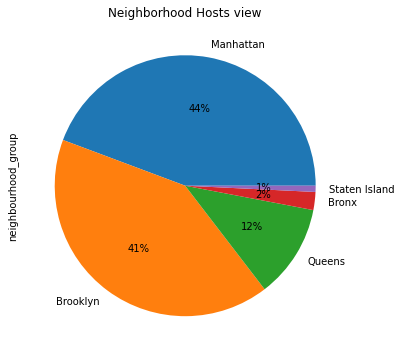

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Neighborhood Hosts view')
abnb_df['neighbourhood_group'].value_counts().plot(kind='pie',y='neighbourhood_group',autopct='%1.0f%%')

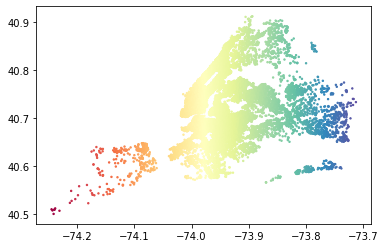

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')
cmap = sns.cubehelix_palette(as_cmap=True)
plt.scatter(x=abnb_df['longitude'], y=abnb_df['latitude'],c=abnb_df['longitude'],s=2, cmap="Spectral")

**4. Avilability of different room types for customers**

If you look at different room types across different hosts spread across different locations in New York we can infer the below details

*   **Private Room:**  These type of rooms are maximum available across all the reagions together.Of all the regions Private rooms are available more in Brooklyn area
*   **Entire home/apt**: These are the second most avaible rooms across New York. Manhattan has got the maximum number of rooms available of these type
*   **Shared room**: These are the type of rooms that are least available in New York. Of all the locations Queens has got the maximum number of Shared room types available







In [ ]:
room_type = abnb_df[['neighbourhood_group','room_type']].value_counts().unstack()
room_type

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


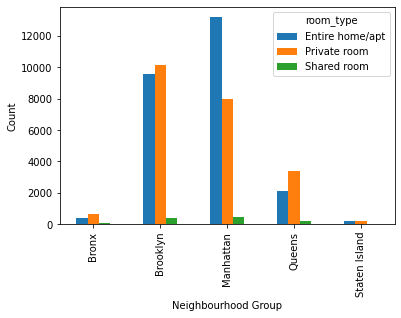

In [ ]:
#sns.barplot(data=abnb_df[['neighbourhood_group','room_type']].value_counts().unstack())

abnb_df[['neighbourhood_group','room_type']].value_counts().unstack().plot(kind='bar',xlabel='Neighbourhood Group',ylabel='Count',stacked=False)


**5. Room Pricing Analysis by Region**

Lets categorize the hosts based on prices into five different categories. Categories being different price ranges **0-2000, 2001-4000, 4001-6000, 6001-8000, 8001-10000**.

Upon categorinzing all th hosts into five of these buckes I found:

*   Maximum rooms fall in the category of **0-2000** price range.
*   **2001-4000** price range category comes in the second place
*   Maximum costliest room types are located in Manhattan region which fall in the price range of **8001-10000**


In [ ]:
price_categories = ['0-2000','2001-4000','4001-6000','6001-8000','8001-10000']
abnb_df['categorical_price'] = abnb_df['price']

In [ ]:
def categorize_price(v_price):
  if v_price >= 0 and v_price <= 2000:
    return price_categories[0]
  elif v_price >= 2001 and v_price <= 4000:
    return price_categories[1]
  elif v_price >= 4001 and v_price <= 6000:
    return price_categories[2]
  elif v_price >= 6001 and v_price <= 8000:
    return price_categories[3]
  else:
    return price_categories[4] 


In [ ]:
abnb_df.categorical_price = abnb_df.categorical_price.apply(lambda x: categorize_price(x))

In [ ]:
abnb_df[['categorical_price','neighbourhood_group']].value_counts().unstack().fillna(0)

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
categorical_price,,,,,
0-2000,1090.0,20085.0,21599.0,5663.0,372.0
2001-4000,1.0,8.0,43.0,2.0,0.0
4001-6000,0.0,7.0,8.0,0.0,1.0
6001-8000,0.0,3.0,6.0,0.0,0.0
8001-10000,0.0,1.0,5.0,1.0,0.0


**6. Which are the Hosts which recieve maximum number of guests**

From the dataset we received we do not have the direct indicator or variable that shows the number of visitors for each of the host.But we can use the Number of Reviews received summed up for each host to get which host has got the maximum number of guests till now.

Instead of finding number of guests for all the hosts let us find out top 10 hosts based on number of reviews received and check who stands out on the top.

Below table and chart that follows has the list of top 10 hosts that received maximum number of quests Maya with host id 3711259 is the person with maximum number of guests



In [ ]:
abnb_df[['host_id','host_name','number_of_reviews']].groupby(['host_id','host_name']).sum('number_of_reviews').sort_values(['number_of_reviews'],ascending=False).head(10)

,,number_of_reviews
host_id,host_name,
37312959,Maya,2273
344035,Brooklyn& Breakfast -Len-,2205
26432133,Danielle,2017
35524316,Yasu & Akiko,1971
40176101,Brady,1818
4734398,Jj,1798
16677326,Alex And Zeena,1355
6885157,Randy,1346
219517861,Sonder (NYC),1281


In [ ]:
highest_guests = abnb_df[['host_id','host_name','number_of_reviews']].groupby(['host_id','host_name']).sum('number_of_reviews').sort_values(['number_of_reviews'],ascending=False).head(10)
highest_guests = highest_guests.reset_index()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

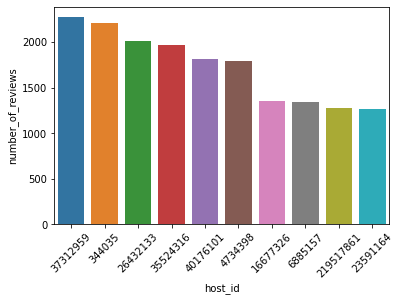

In [ ]:
sns.barplot(x='host_id',y='number_of_reviews',data=highest_guests, order=highest_guests.sort_values(['number_of_reviews'],ascending=False).host_id)
plt.xticks(rotation=45)

**7. Which locations receive maximum numer of guests**

Having found the hosts that receive maximum number of guests, lets now find out which locations receive the maximum number of guests. 

Of all the localities Brooklyn is the place that recieves maximumum number of guests followed by Manhattan.

Staten Island is the place that received minimum number of guests among all the five regions

In [ ]:
highest_hosts_by_location = abnb_df[['neighbourhood_group','number_of_reviews']].groupby(['neighbourhood_group']).sum('number_of_reviews').sort_values(['number_of_reviews'],ascending=False).fillna(0)
#highest_hosts_by_location = highest_hosts_by_location.reset_index()

highest_hosts_by_location

,number_of_reviews
neighbourhood_group,
Brooklyn,486574
Manhattan,454569
Queens,156950
Bronx,28371
Staten Island,11541


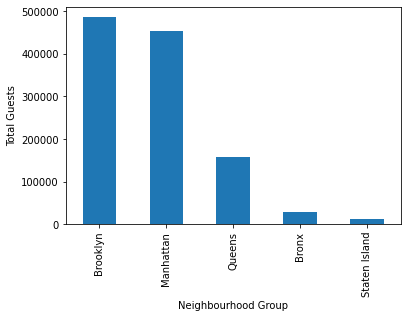

In [ ]:
highest_hosts_by_location.plot(kind='bar',xlabel='Neighbourhood Group',ylabel='Total Guests',stacked=False).get_legend().set_visible(False)


**8. Whcih are the busiest hosts**

Lets try to find out which hosts are the busiest among all of them and also identify the locality to which they belong to. Instead of finding all the hosts we will restrict to identify the top 10 busiest hosts in the city.

In order to find the busies people, I have considered reviews_per_month variable as an indicator to identify who has been busy or recieving highest number of guests in a month

Below table gives the list of top 10 hosts along with the locality they belong to.

Sonder(NYC) from Manhattan seems to b e

In [ ]:
busy_hosts = abnb_df[~abnb_df['reviews_per_month'].isna()][['neighbourhood_group','host_name','reviews_per_month']].groupby(['neighbourhood_group','host_name']).sum('reviews_per_month').reset_index().sort_values(['reviews_per_month'],ascending=False).head(10)
busy_hosts

,neighbourhood_group,host_name,reviews_per_month
10170,Manhattan,Sonder (NYC),397.56
5960,Manhattan,Alex,270.53
9030,Manhattan,Michael,258.41
6890,Manhattan,David,236.32
3929,Brooklyn,Michael,177.40
8831,Manhattan,Maria,157.64
1664,Brooklyn,David,149.01
8059,Manhattan,John,142.85
2893,Brooklyn,John,129.44
2729,Brooklyn,Jason,128.99


**9.Conclusion**

*   Airbnb has got extensive availability of hosts in  Brroklyn and Manhattan regions of the New York city. Airbnb can take up its camapingn to other part of the city to expand its business and also provide rooms at a cheaper prices to its guests if expanded to suburb areas
*   Majority of rooms that are available are Private rooms and Entire home/appartments, so if Airbnb can find hosts that can provide shared room type of accomodation they can expand their business to the customers that are looking for shared accomodations
*   Hosts that received maximum number of guests and are also busy can be further assisted to continue the good things they are doing and also give some perks and assistance to the hosts that are not doing good by understanding the reason for low guest turnout




